#### Importing necessary libraries

In [139]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings

warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
%matplotlib inline

## I wonder if

### 1. we are releasing more and more movies year on year?
### 2. a movie genre is preferred by the directors?
### 3. there is gender dominance in the industry?

#### Importing the IMDB dataset

In [140]:
df = pd.read_csv('imdb_top_1000.csv')

#### Viewing data

In [141]:
df.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


#### Dimensions of the dataset

In [142]:
rows, cols = df.shape
print("Row count = ",rows,'\t',"Column count = ",cols)

Row count =  1000 	 Column count =  16


#### Stats

In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    899 non-null    object 
 4   Runtime        1000 non-null   object 
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     843 non-null    float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    object 
dtypes: float64(2), int64(1), object(13)
memory usage: 125.1+ KB


#### Checking for columns with null values

In [144]:
np.sum(df.isna())

Poster_Link        0
Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64

#### CERTIFICATE Column : we would not need the certificate data to answer the question so we can drop the column
#### GROSS and META SCORE Column - we can impute the rows with the respective column's mean value

In [145]:
df['Released_Year'].value_counts()

2014    32
2004    31
2009    29
2013    28
2016    28
        ..
1926     1
1936     1
1924     1
1921     1
PG       1
Name: Released_Year, Length: 100, dtype: int64

In [146]:
df.drop(['Certificate'], axis = 1, inplace = True)

# Converting datatype for Gross Variable, IMDB Rating and released year
df['Gross'] = df['Gross'].str.replace(',','')
df['Gross'] = df['Gross'].astype(float)
df['IMDB_Rating'] = df['IMDB_Rating'].astype(float)
df['Released_Year'] = df['Released_Year'].str.replace('PG','0')
df['Released_Year'] = df['Released_Year'].astype(int)

# Imputing mean values across the 2 columns
df['Gross'].fillna(df['Gross'].mean(), inplace=True)
df['Meta_score'].fillna(df['Meta_score'].mean(), inplace = True)

In [147]:
# stats

df.describe()

,Released_Year,IMDB_Rating,Meta_score,No_of_Votes,Gross
count,1000.000000,1000.000000,1000.00000,1.000000e+03,1.000000e+03
mean,1989.226000,7.949300,77.97153,2.736929e+05,6.803475e+07
std,67.135341,0.275491,11.36206,3.273727e+05,1.000371e+08
min,0.000000,7.600000,28.00000,2.508800e+04,1.305000e+03
25%,1976.000000,7.700000,72.00000,5.552625e+04,5.012919e+06
50%,1999.000000,7.900000,77.97153,1.385485e+05,4.238945e+07
75%,2009.000000,8.100000,85.25000,3.741612e+05,6.803475e+07
max,2020.000000,9.300000,100.00000,2.343110e+06,9.366622e+08


In [148]:
df.describe(include = ['O'])

,Poster_Link,Series_Title,Runtime,Genre,Overview,Director,Star1,Star2,Star3,Star4
count,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
unique,1000,999,140,202,1000,548,660,841,891,939
top,https://m.media-amazon.com/images/M/MV5BMDFkYT...,Drishyam,100 min,Drama,Two imprisoned men bond over a number of years...,Alfred Hitchcock,Tom Hanks,Emma Watson,Rupert Grint,Michael Caine
freq,1,2,23,85,1,14,12,7,5,4


#### There is one movie which could be appearing 2 times as there are only 999 unique so lets look at that

In [149]:
df[df['Series_Title'].duplicated(keep = False)]

,Poster_Link,Series_Title,Released_Year,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
87,https://m.media-amazon.com/images/M/MV5BYmY3Mz...,Drishyam,2013,160 min,"Crime, Drama, Thriller",8.3,A man goes to extreme lengths to save his fami...,77.97153,Jeethu Joseph,Mohanlal,Meena,Asha Sharath,Ansiba,30722,6.803475e+07
136,https://m.media-amazon.com/images/M/MV5BYmJhZm...,Drishyam,2015,163 min,"Crime, Drama, Mystery",8.2,Desperate measures are taken by a man who trie...,77.97153,Nishikant Kamat,Ajay Devgn,Shriya Saran,Tabu,Rajat Kapoor,70367,7.394780e+05


#### This gives us duplicated rows and the reason behind duplication is that the latest movie is the remake of original movie in 2013 so we can let the duplicate rows be

[]

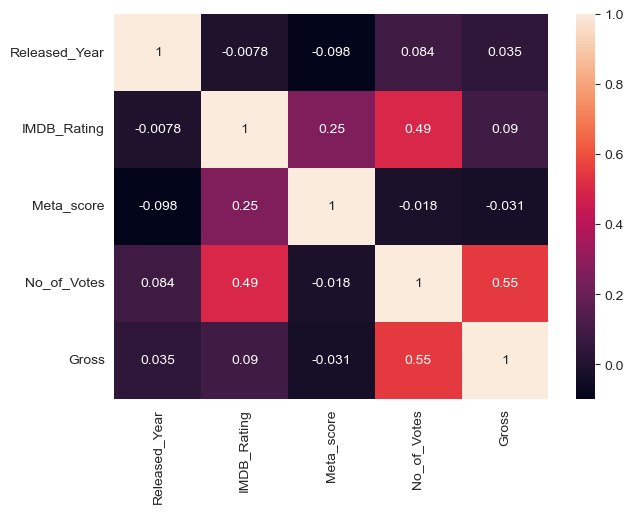

In [166]:
# Let's take a look at the correlation of our variables

fig, ax = plt.subplots(figsize=(7,5))

sns.heatmap(df.corr(), annot = True)

plt.plot()

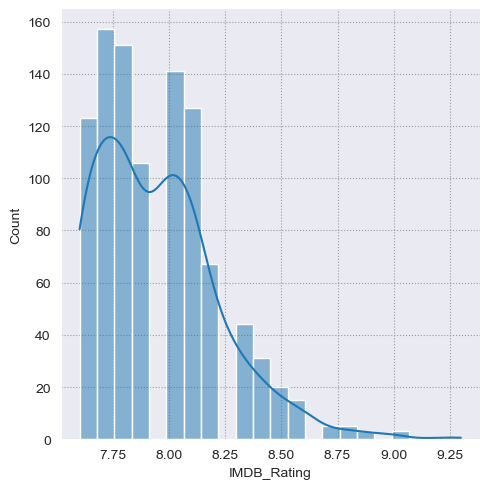

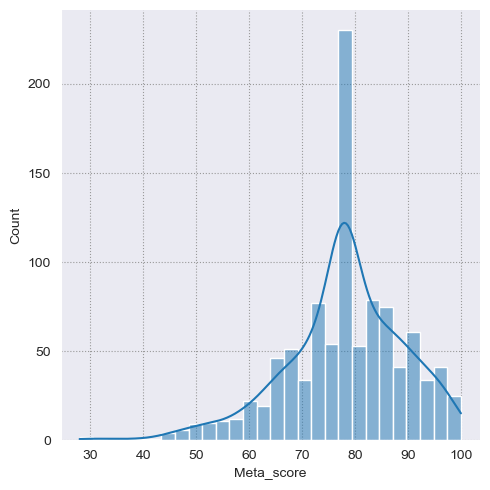

In [191]:
# Let's take a look at distribution of IMDB Rating and Meta score
sns.displot(df['IMDB_Rating'], kde = True)
sns.displot(df['Meta_score'], kde = True)

#### Meta score is left skewed where as IMDB rating is a bimodal distribution

## Let's get going by answering our questions using the data

#### Let's have a look at number of movies released since last 10 years

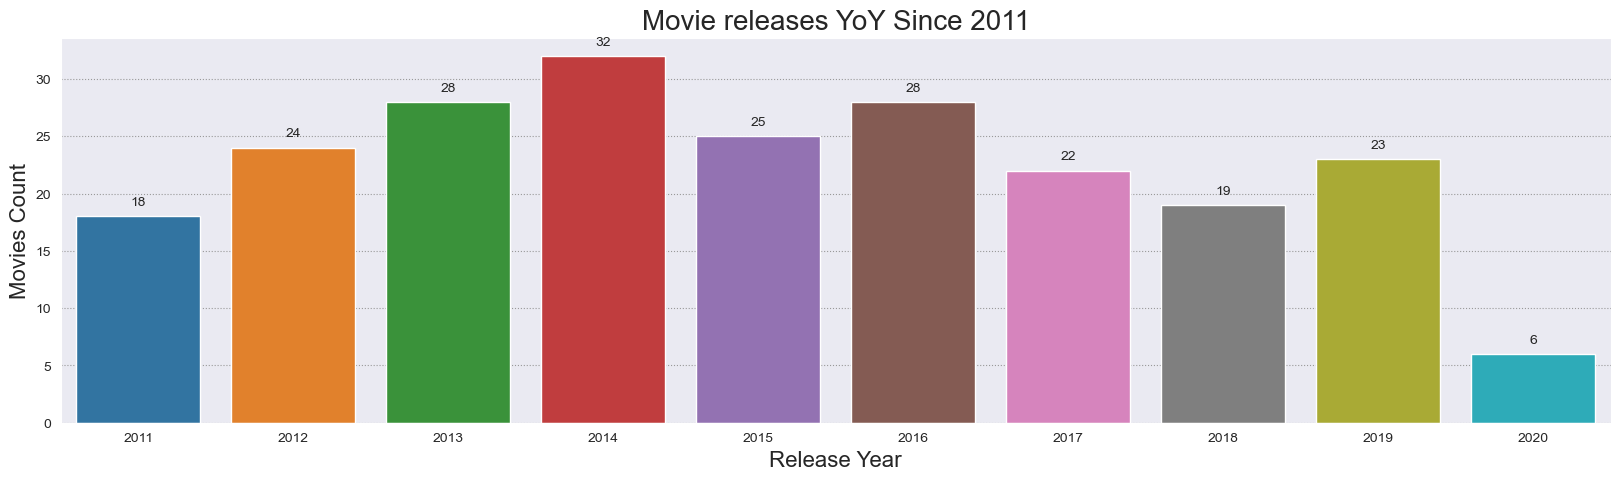

In [150]:
fig,ax =plt.subplots(figsize=(20,5))

movie_releases = df[df['Released_Year'] > 2010]
splot = sns.countplot(ax = ax, x = movie_releases['Released_Year'])

# Set label for x-axis
ax.set_xlabel( "Release Year" , size = 16 )
  
# Set label for y-axis
ax.set_ylabel( "Movies Count" , size = 16 )
  
# Set title for plot
ax.set_title( "Movie releases YoY Since 2011" , size = 20 )

# For annotating the bars
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()),  ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

plt.show()

### We can clearly see that there is no significant rise in movie releases YoY in recent years

#### Let's check if a genre is preffered over other genre - we will have a look at top 5 genre

In [151]:
# since we have comma separated values we will import collection library to count a genre
import collections as c

genre_list=[]
for genre_string in df['Genre']:
    for genre in genre_string.split(','):
        genre_list.append(genre.strip().upper())

count=c.Counter(genre_list)
count=count.most_common()[:5]

genre_string, genre=map(list,zip(*count))

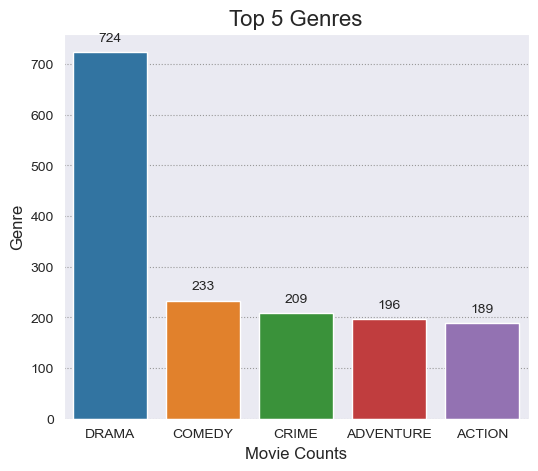

In [152]:
# Creating a bar graph for most released genre

fig,ax = plt.subplots(figsize=(6,5))

splot = sns.barplot(x = genre_string, y = genre)

# Set label for x-axis
ax.set_xlabel("Movie Counts" , size = 12 )
  
# Set label for y-axis
ax.set_ylabel( "Genre" , size = 12 )
  
# Set title for plot
ax.set_title( "Top 5 Genres" , size = 16 )

# For annotating the bars
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()),  ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

plt.show()

### We can see the trend and can conclude that Drama is the most preffered genre by the directors

#### Next, we will look at if there is any gender dominance

In [154]:
df_new = df.copy()

for i in range(len(df)):
    df_new.at[i,'Cast'] = df_new.at[i,'Star1'] + ',' + df_new.at[i,'Star2'] + ',' + df_new.at[i,'Star3'] + ',' + df_new.at[i,'Star4']

    
actor_list=[]
for actor_string in df_new['Cast']:
    for actor in actor_string.split(','):
        actor_list.append(actor.strip().upper())

count=c.Counter(actor_list)
count=count.most_common()[:10]

actor_string, actor=map(list,zip(*count))

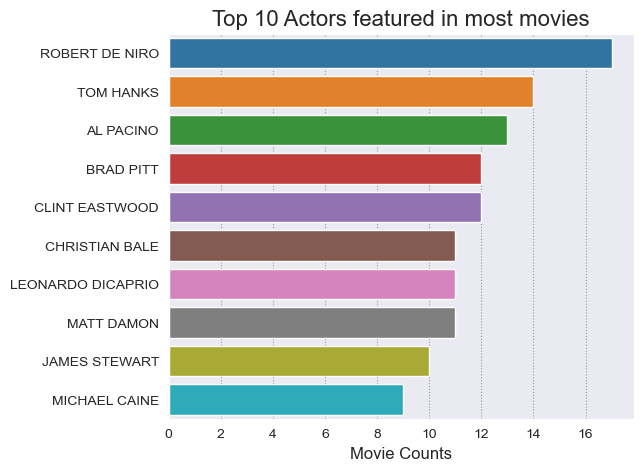

In [159]:
# Creating a bar graph for actors featuring in most number of movies

fig,ax = plt.subplots(figsize=(6,5))

splot = sns.barplot(y = actor_string, x = actor)

# Set label for y-axis
ax.set_ylabel("" , size = 12 )
  
# Set label for x-axis
ax.set_xlabel( "Movie Counts" , size = 12 )
  
# Set title for plot
ax.set_title( "Top 10 Actors featured in most movies" , size = 16 )

plt.show()

### Quite recognisable names in the list - but to answer the question, all top 10 Actors are males - no female found in the list of top 10. While that doesn't speak for the whole data (this is just 1000 movies data) but we can see male dominance in the industry.